# plot

<img src="https://ss0.bdstatic.com/70cFuHSh_Q1YnxGkpoWK1HF6hhy/it/u=3918372317,2933688975&fm=26&gp=0.jpg" style="zoom:50%" /> 
```
![image]()

<img src="  " /> 
修改width：
    <img src="  " width="200px" />   
或者修改height：
    <img src="  " style="height:200px" />
也可以直接按比例缩放：
    <img src="  " style="zoom:70%" />
```


[xkcd颜色](https://xkcd.com/color/rgb/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
import os
import sys
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
%matplotlib inline


## set

In [151]:
# plt.rc("font",family="SimHei",size="12")  #用于解决中文显示不了的问题
# sns.set_style({"font.sans-serif":['Microsoft YaHei','SimHei']})#显示中文

In [2]:
PI = np.pi
np.set_printoptions(precision=2,threshold=np.inf,suppress=True)

## Seaborn 的示例数据集（load_dataset）
sns.load_dataset  
https://github.com/mwaskom/seaborn-data
1. anscombe.csv  
2. attention.csv  
3. brain_networks.csv  
4. car_crashes.csv  
5. diamonds.csv  
6. dots.csv/  
7. exercise.csv  
8. flights.csv  
9. fmri.csv  
10. gammas.csv  
11. iris.csv  
12. mpg.csv  
13. planets.csv  
14. tips.csv  
15. titanic.csv/  


In [9]:
dataset_=sns.load_dataset('mpg')
dataset_

URLError: <urlopen error [Errno 11004] getaddrinfo failed>

In [72]:
dataset_1=sns.load_dataset('planets')
dataset_1

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


In [3]:
# 数据准备
x = np.linspace(0,10,100).reshape(-1,1)
y = np.cumsum(np.random.randn(100,6),0)
y1= np.cumsum(np.random.randn(6,100),0)# 绘图时报错
# x = np.linspace(-2*PI,2*PI,100)
# y = np.sin(x)
x.shape
y.shape

(100, 1)

(100, 6)

In [4]:
# x = np.linspace(0,100,20)
# y = np.arange(1,11).reshape(-1,1).repeat(20, axis=1)
# y = y*x.reshape(1,-1)
# y = y.T
'''
二维数据在一张图绘制多个图像，最高维度要保持一致，为数据点的数量，y的1维为线的个数'''
x = np.linspace(0,100,20)
y = np.arange(1,11).reshape(1,-1).repeat(20, axis=0)
y = y*x.reshape(-1,1)
x.shape
y.shape

'\n二维数据在一张图绘制多个图像，最高维度要保持一致，为数据点的数量，y的1维为线的个数'

(20,)

(20, 10)

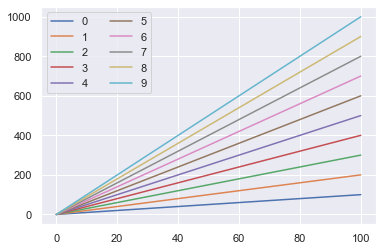

In [5]:
plt.clf()
sns.set()
plt.plot(x,y)
plt.legend(range(10), ncol=2, loc="upper left")
# plt.legend(*range(10), ncol=2, loc="upper left")
plt.show()
plt.pause(0.1)

## kdeplot(核密度估计图)
核密度估计(kernel density estimation)是在概率论中用来估计未知的密度函数，属于非参数检验方法之一。通过核密度估计图可以比较直观的看出数据样本本身的分布特征。  
*seaborn.kdeplot(data,data2=None,shade=False,vertical=False,kernel='gau',bw='scott',gridsize=100,cut=3,clip=None,legend=True,cumulative=False,shade_lowest=True,cbar=False, cbar_ax=None, cbar_kws=None, ax=None, *kwargs)  
* cut：参数表示绘制的时候，切除带宽往数轴极限数值的多少(默认为3)
* cumulative ：是否绘制累积分布
* shade：若为True，则在kde曲线下面的区域中进行阴影处理，color控制曲线及阴影的颜色
* vertical：表示以X轴进行绘制还是以Y轴进行绘制(deprecated)
* cbar：参数若为True，则会添加一个颜色棒(颜色帮在二元kde图像中才有)
* [seaborn.kdeplot](http://seaborn.pydata.org/generated/seaborn.kdeplot.html)

In [83]:
# sns.kdeplot
# xy
x = np.random.randn(100)*2
y = np.random.random(100)
z = np.random.randint(0,2, size=(100,))
t = np.random.randint(1,4, size=(100,))
df = pd.DataFrame(data=np.stack((x,y,z,t), axis=1),columns=[*"xyzt"])
df
sns.set()
# x
# y

,x,y,z,t
0,-0.950561,0.141129,1.0,2.0
1,-2.511823,0.462919,1.0,2.0
2,2.087270,0.307888,0.0,2.0
3,-2.391815,0.267709,0.0,1.0
4,-0.349223,0.695972,1.0,1.0
...,...,...,...,...
95,-0.792129,0.867569,1.0,3.0
96,-1.109683,0.159932,0.0,2.0
97,-0.203793,0.562837,0.0,1.0
98,4.106871,0.521532,1.0,1.0


<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:ylabel='Density'>

<AxesSubplot:xlabel='Density'>

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

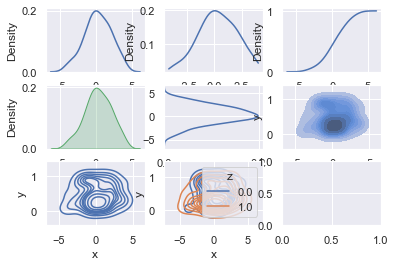

In [34]:
fig, axes = plt.subplots(3,3)
sns.kdeplot(x, shade=False, ax=axes[0,0])
sns.kdeplot(x,cut=0, ax=axes[0,1])
sns.kdeplot(x,cumulative=True, ax=axes[0,2])
sns.kdeplot(x, shade=True, color='g', ax=axes[1,0])
# sns.kdeplot(x,vertical=True, ax=axes[1,1])
sns.kdeplot(y=x, ax=axes[1,1])
sns.kdeplot(data=df,x='x', y='y',shade=True, ax=axes[1,2])
sns.kdeplot(data=df,x='x', y='y',shade=False, ax=axes[2,0])
sns.kdeplot(data=df,x='x', y='y',shade=False, ax=axes[2,1],hue='z')

<AxesSubplot:xlabel='x', ylabel='y'>

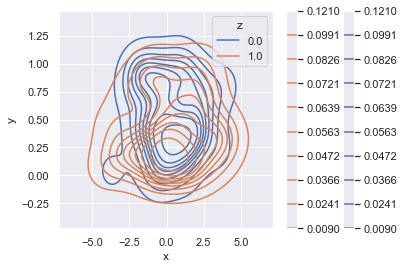

In [35]:
# sns.kdeplot(x,y,shade=False, cbar=True)
sns.kdeplot(data=df, x='x',y='y',hue='z',shade=False,cbar=True)

### 星云图

<AxesSubplot:xlabel='x', ylabel='y'>

<AxesSubplot:xlabel='x', ylabel='y'>

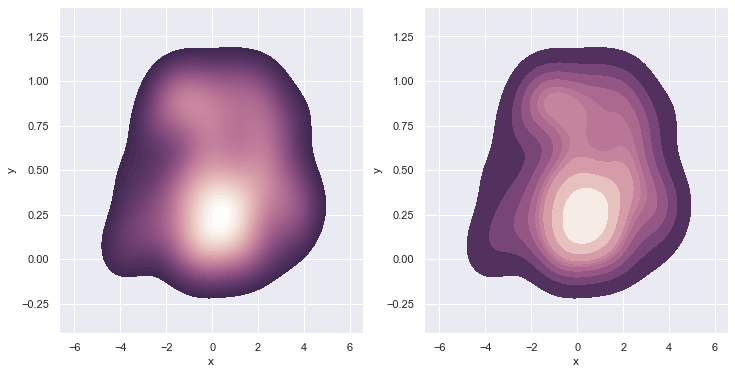

In [52]:
f, ax = plt.subplots(1,2,figsize=(12, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=.2, light=1, reverse=True)
# sns.kdeplot(x, y, cmap=cmap, n_levels=60, shade=True)
sns.kdeplot(data=df, x='x',y='y',cmap=cmap, shade=True, n_levels=60,ax=ax[0])
sns.kdeplot(data=df, x='x',y='y',cmap=cmap, shade=True, ax=ax[1])

## 关系图

### displot

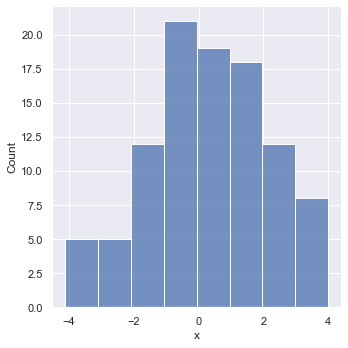

In [69]:
# fig, axes = plt.subplots(2,3)
sns.displot(data=df,x='x')
# sns.displot(x, ax=axes[0,1])
# sns.displot(x, ax=axes[0,2], kde=False)
# sns.displot(x, ax=axes[1,0], bins= 20)
# sns.displot(x, ax=axes[1,1], bins= [i for i in range(4)])
# sns.displot(x, ax=axes[1,2], rug=True)

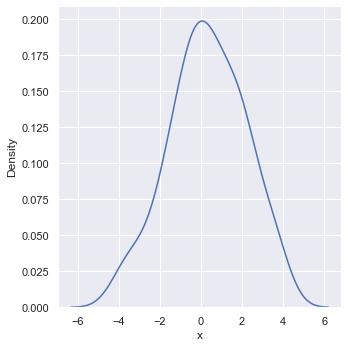

In [68]:
sns.displot(data=df,x='x',kind='kde')


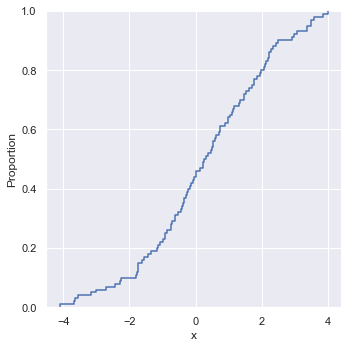

In [70]:
sns.displot(data=df,x='x',kind='ecdf')


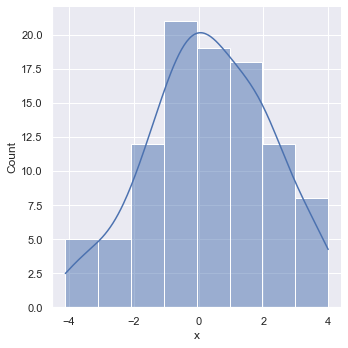

In [71]:
sns.displot(data=df,x='x',kde=True)


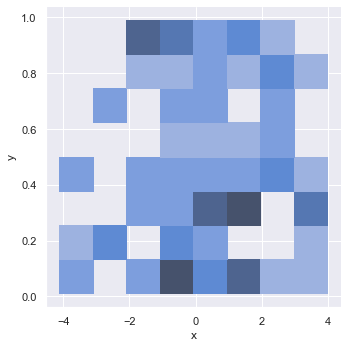

In [72]:
sns.displot(data=df,x='x',y='y')


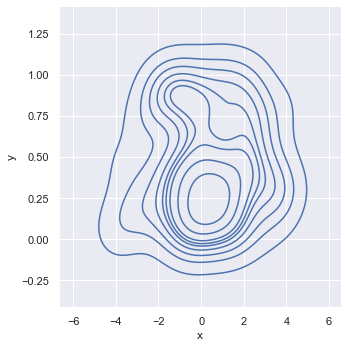

In [73]:
sns.displot(data=df,x='x',y='y',kind='kde')


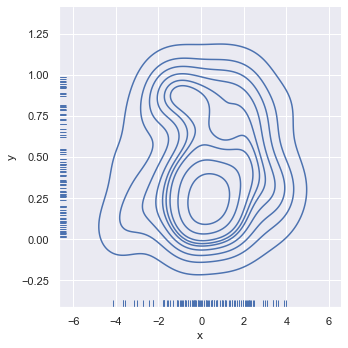

In [74]:
sns.displot(data=df,x='x',y='y',kind='kde',rug=True)


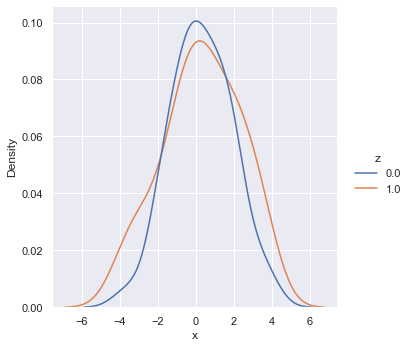

In [76]:
sns.displot(data=df,x='x',kind='kde',hue='z')


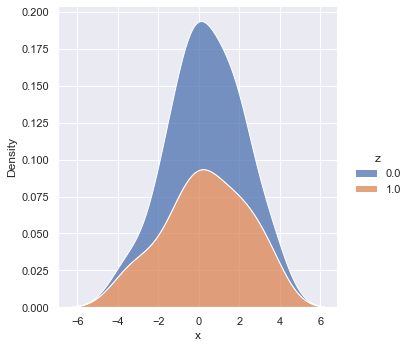

In [77]:
sns.displot(data=df,x='x',kind='kde',hue='z',multiple="stack")


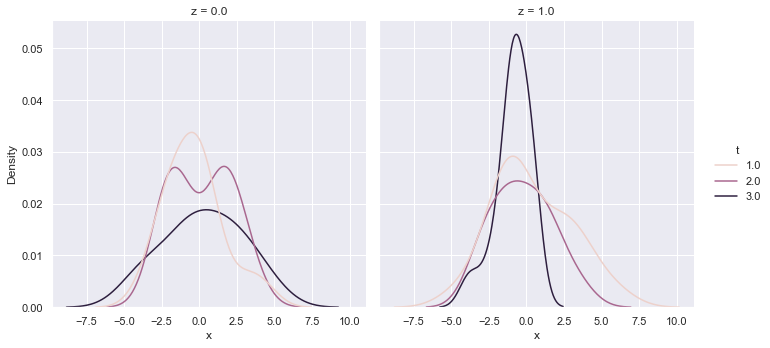

In [86]:
sns.displot(data=df, x="x", hue="t", col="z", kind="kde")

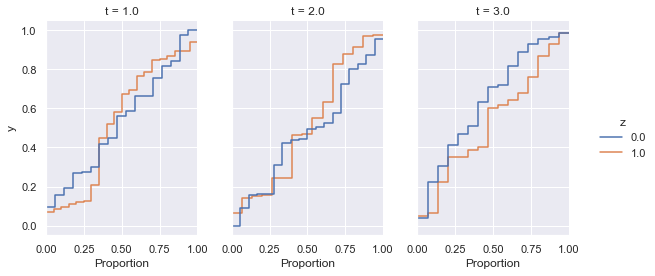

In [87]:
sns.displot(
    data=df, y="y", hue="z", col="t",
    kind="ecdf", height=4, aspect=.7,
)

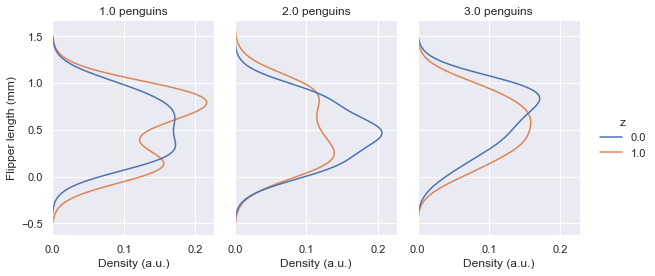

In [88]:
g = sns.displot(
    data=df, y="y", hue="z", col="t",
    kind="kde", height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

### histplot

<AxesSubplot:xlabel='x', ylabel='Count'>

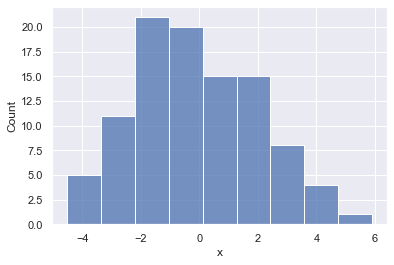

In [90]:
sns.histplot(data=df, x="x")

<AxesSubplot:xlabel='Count', ylabel='y'>

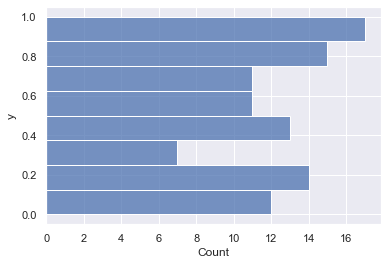

In [91]:
sns.histplot(data=df, y="y")

<AxesSubplot:xlabel='x', ylabel='Count'>

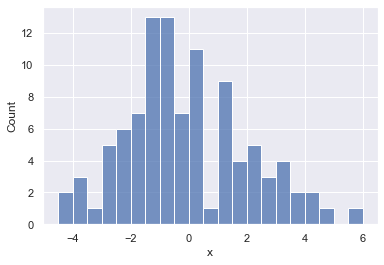

In [93]:
sns.histplot(data=df, x="x",binwidth=0.5)

<AxesSubplot:xlabel='x', ylabel='Count'>

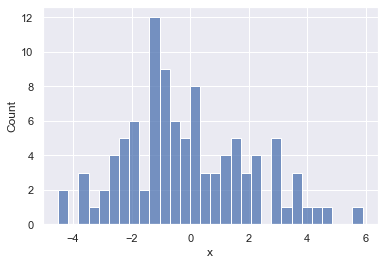

In [95]:
sns.histplot(data=df, x="x",bins=30)

<AxesSubplot:xlabel='x', ylabel='Count'>

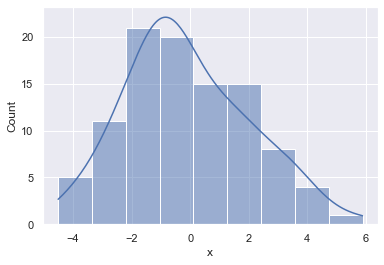

In [96]:
sns.histplot(data=df, x="x",kde=True)

<AxesSubplot:ylabel='Count'>

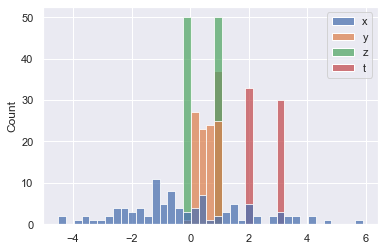

In [97]:
sns.histplot(data=df)

<AxesSubplot:xlabel='x', ylabel='Count'>

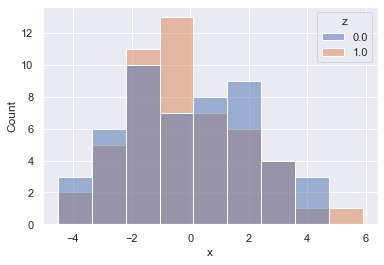

In [100]:
sns.histplot(data=df ,x='x', hue='z')

<AxesSubplot:xlabel='x', ylabel='Count'>

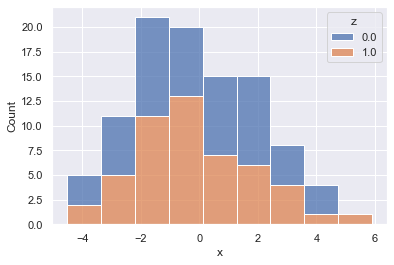

In [101]:
sns.histplot(data=df ,x='x', hue='z',multiple='stack')

<AxesSubplot:xlabel='x', ylabel='Count'>

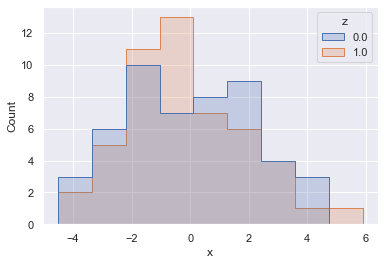

In [103]:
sns.histplot(data=df ,x='x', hue='z',element='step')

<AxesSubplot:xlabel='x', ylabel='Count'>

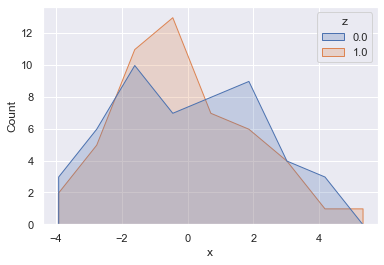

In [104]:
sns.histplot(data=df ,x='x', hue='z',element='poly')

<AxesSubplot:xlabel='x', ylabel='Density'>

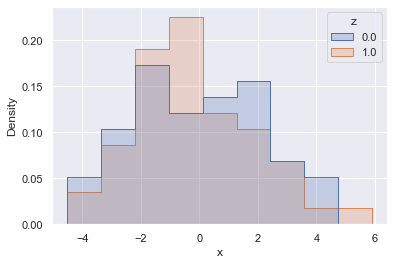

In [105]:
sns.histplot(
    df, x="x", hue="z", element="step",
    stat="density", common_norm=False,
)

<AxesSubplot:xlabel='x', ylabel='Probability'>

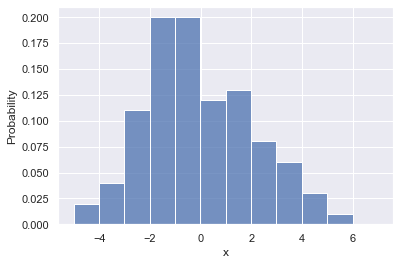

In [106]:
sns.histplot(data=df, x="x", stat="probability", discrete=True)

<AxesSubplot:xlabel='x', ylabel='Count'>

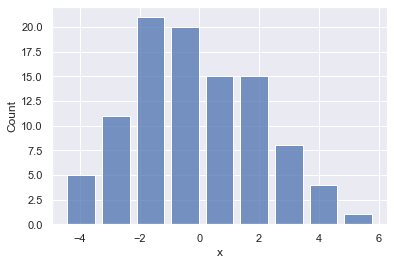

In [107]:
sns.histplot(data=df, x="x", shrink=.8)

<AxesSubplot:xlabel='x', ylabel='Count'>

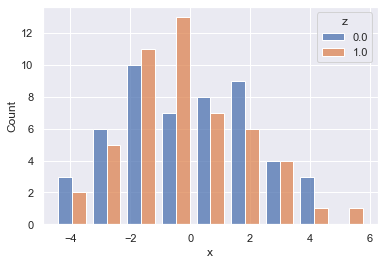

In [108]:
sns.histplot(data=df, x="x", hue="z", multiple="dodge", shrink=.8)

<AxesSubplot:xlabel='x', ylabel='Count'>

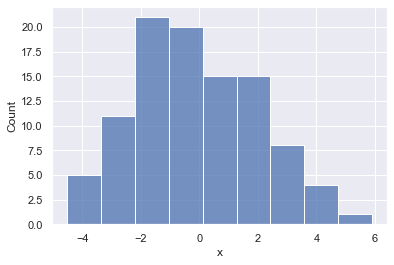

In [110]:
sns.histplot(data=df, x="x")

D:\MySoft\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='x', ylabel='Count'>

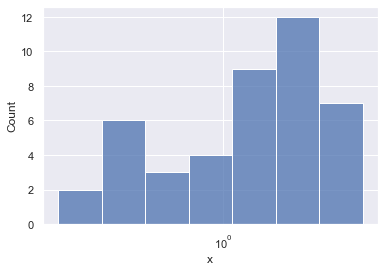

In [111]:
sns.histplot(data=df, x="x", log_scale=True)

D:\MySoft\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='x', ylabel='Count'>

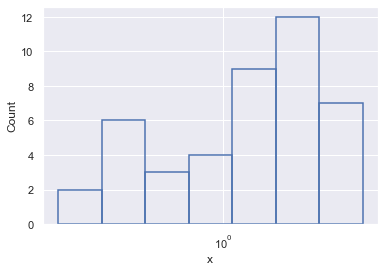

In [124]:
sns.histplot(data=df, x="x", log_scale=True, fill=False)

D:\MySoft\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='x', ylabel='Count'>

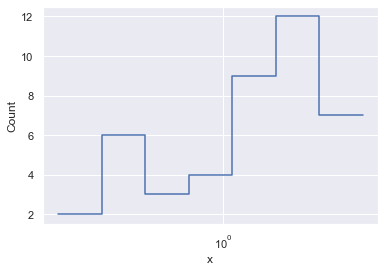

In [123]:
sns.histplot(data=df, x="x", log_scale=True, element="step", fill=False)

D:\MySoft\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='x', ylabel='Density'>

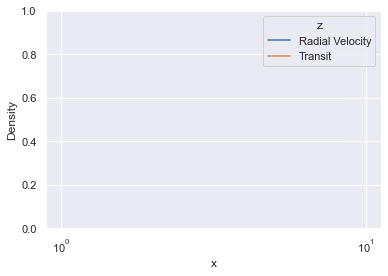

In [121]:
sns.histplot(
    data=df, x="x", hue="z",
    hue_order=["Radial Velocity", "Transit"],
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

<AxesSubplot:xlabel='x', ylabel='y'>

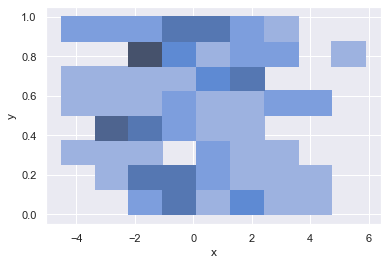

In [120]:
sns.histplot(df, x="x", y="y")

<AxesSubplot:xlabel='x', ylabel='y'>

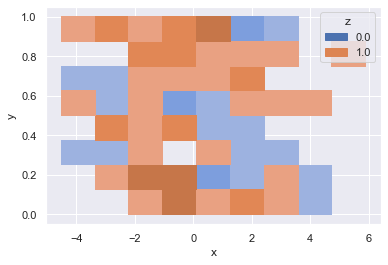

In [119]:
sns.histplot(df, x="x", y="y", hue="z")

<AxesSubplot:xlabel='x', ylabel='y'>

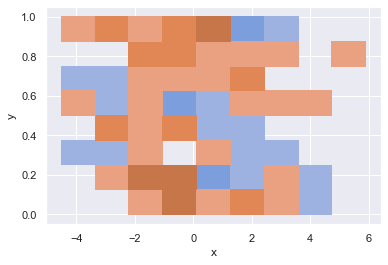

In [118]:
sns.histplot(
    df, x="x", y="y", hue="z", legend=False
)

<AxesSubplot:xlabel='x', ylabel='y'>

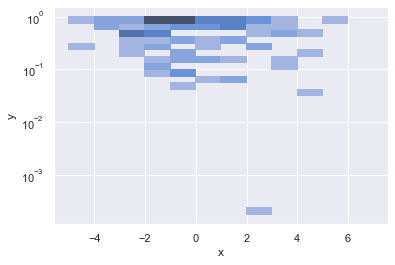

In [116]:
sns.histplot(
    df, x="x", y="y",
    bins=30, discrete=(True, False), log_scale=(False, True),
)

<AxesSubplot:xlabel='x', ylabel='y'>

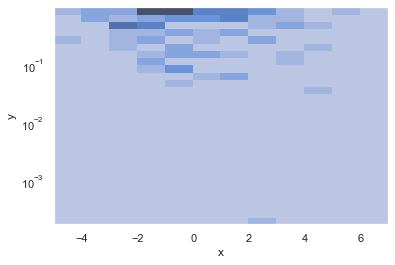

In [114]:
sns.histplot(
    df, x="x", y="y",
    bins=30, discrete=(True, False), log_scale=(False, True),
    thresh=None,
)

<AxesSubplot:xlabel='x', ylabel='t'>

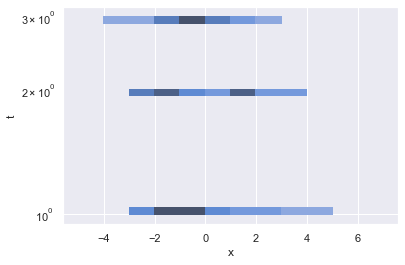

In [113]:
sns.histplot(
    df, x="x", y="t",
    bins=30, discrete=(True, False), log_scale=(False, True),
    pthresh=.05, pmax=.9,
)

<AxesSubplot:xlabel='x', ylabel='y'>

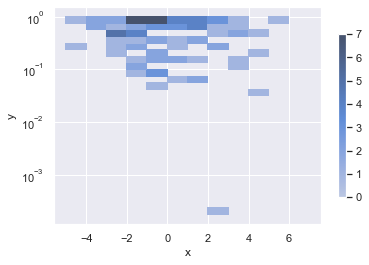

In [112]:
sns.histplot(
    df, x="x", y="y",
    bins=30, discrete=(True, False), log_scale=(False, True),
    cbar=True, cbar_kws=dict(shrink=.75),
)

## distplot
displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。  
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)  
* 通过hist和kde参数调节是否显示直方图及核密度估计(默认hist,kde均为True)
* bins：int或list，控制直方图的划分
* rug：控制是否生成观测数值的小细条
* fit：控制拟合的参数分布图形，能够直观地评估它与观察数据的对应关系(黑色线条为确定的分布)
* hist_kws, kde_kws, rug_kws, fit_kws参数接收字典类型，可以自行定义更多高级的样式
* norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

<AxesSubplot:ylabel='Density'>

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

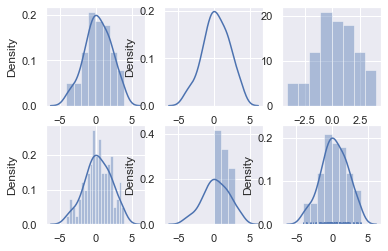

In [53]:
fig, axes = plt.subplots(2,3)
sns.distplot(x, ax=axes[0,0])
sns.distplot(x, ax=axes[0,1], hist=False)
sns.distplot(x, ax=axes[0,2], kde=False)
sns.distplot(x, ax=axes[1,0], bins= 20)
sns.distplot(x, ax=axes[1,1], bins= [i for i in range(4)])
sns.distplot(x, ax=axes[1,2], rug=True)

##### 拟合标准正态分布

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

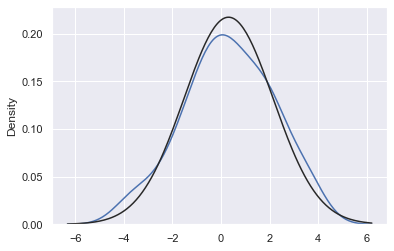

In [54]:
from scipy.stats import norm
sns.distplot(x,hist=False,fit=norm) #拟合标准正态分布

In [59]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


AttributeError: 'Line2D' object has no property 'fit'

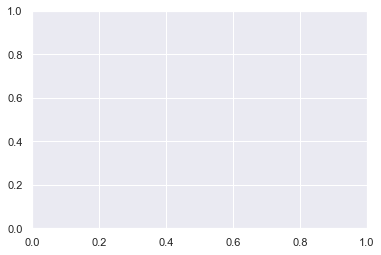

In [58]:
# from scipy.stats import norm
sns.kdeplot(x,fit=norm) #拟合标准正态分布

D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\MySoft\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Density'>

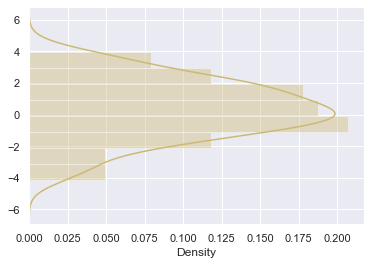

In [60]:
# hist_kws, kde_kws, rug_kws, fit_kws参数接收字典类型，可以自行定义更多高级的样式
sns.distplot(x,kde_kws={"label":"KDE"},vertical=True,color="y")

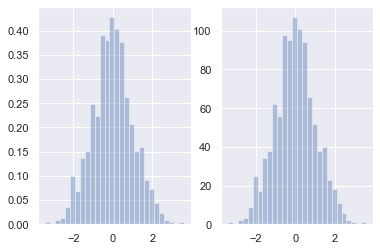

In [188]:
# norm_hist：若为True, 则直方图高度显示密度而非计数(含有kde图像中默认为True)
fig,axes=plt.subplots(1,2)
sns.distplot(x,norm_hist=True,kde=False,ax=axes[0]) #左图
sns.distplot(x,kde=False,ax=axes[1]) #右图

### pairplot

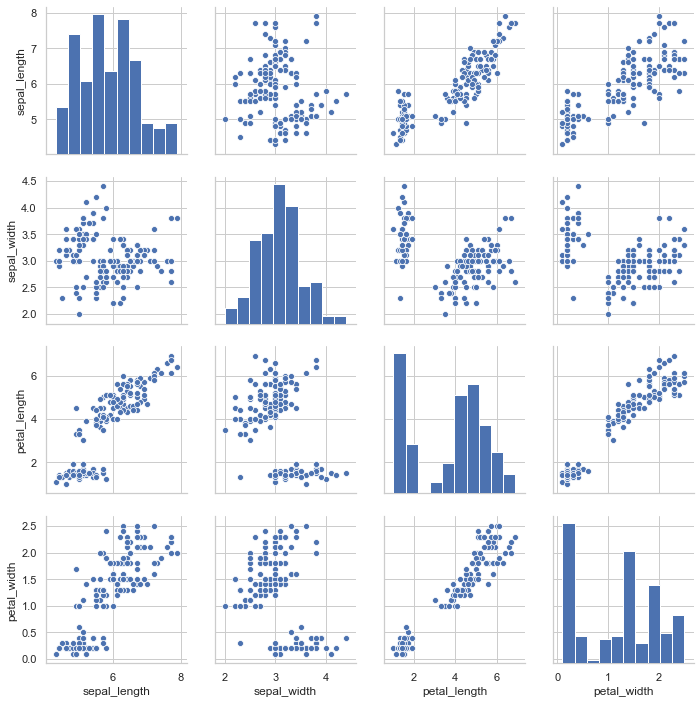

In [360]:
iris = sns.load_dataset("iris")
# iris
sns.pairplot(iris)

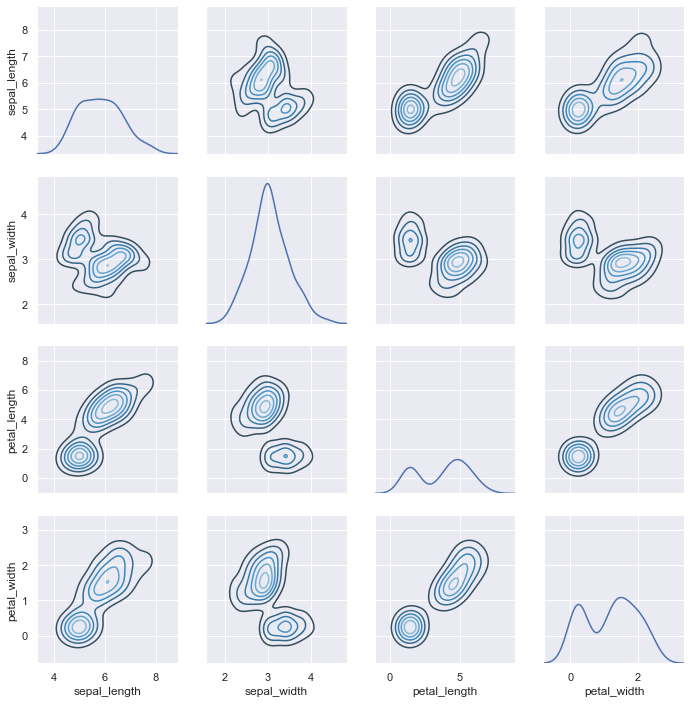

In [246]:
# 网
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap="Blues_d", n_levels=6)

In [262]:
c1 = np.random.randn(100)*np.random.rand()*np.random.randint(2,4)
# c2 = np.arange(2,21,2)*1.1
c2 = np.random.randn(100)*np.random.rand()*np.random.randint(1,4)
# c2 = np.arange(100)*np.random.rand()*np.random.randint(1,3)
c = np.stack([c1,c2],axis=1)
df_c = pd.DataFrame(c)
df_c

,0,1
0,0.298258,0.781469
1,-0.045787,6.280933
2,0.074193,-2.360684
3,0.111146,2.046426
4,0.323220,-6.331966
...,...,...
95,0.151293,-0.343463
96,0.037397,-0.269750
97,-0.295085,-3.967915
98,0.048712,1.163321


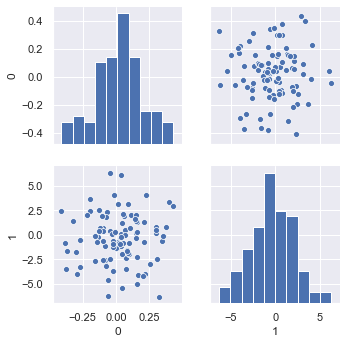

In [263]:
# sns.pairplot
sns.pairplot(df_c)

### jointplot

In [255]:
# sns.kdeplot
# xy
x = np.random.randn(100)
y = np.random.random(100)
sns.set()
x
y

array([-1.17,  0.46,  0.99,  0.88, -1.42, -1.41,  0.62,  1.05, -0.72,
       -1.03,  1.2 ,  1.44, -0.26, -1.56, -0.75,  0.73, -1.49,  1.55,
       -0.28,  1.32,  2.63,  0.34,  1.68,  0.13,  2.31,  0.59, -1.18,
        0.5 ,  0.43,  0.74, -0.26,  1.51, -2.54,  1.  , -1.18, -1.1 ,
       -0.53,  0.39,  0.34,  2.79, -1.04,  0.35, -0.3 ,  0.19,  0.27,
        1.  , -0.22,  0.15, -0.15,  1.46, -2.14,  1.  , -0.42,  1.01,
       -0.9 ,  0.19, -0.11,  0.29,  0.38,  0.3 ,  0.03,  0.05, -2.29,
        0.17,  1.09, -3.47,  0.41,  0.05, -0.04,  0.49,  0.03, -1.97,
        0.54,  0.04, -0.08,  2.  ,  0.4 ,  0.49,  0.56,  0.31, -0.37,
        1.13, -0.12, -0.8 , -0.55,  0.92, -1.  ,  0.36,  0.24,  0.5 ,
        1.06,  0.27,  1.21, -0.06,  0.78,  2.41,  0.92,  0.34, -0.17,
        0.44])

array([0.31, 0.84, 0.84, 0.52, 0.65, 0.87, 0.58, 0.7 , 0.64, 0.44, 0.37,
       0.6 , 0.96, 0.22, 0.56, 0.14, 0.12, 0.76, 0.03, 0.78, 0.07, 0.94,
       0.3 , 0.34, 0.42, 0.86, 0.07, 0.94, 0.74, 0.07, 0.88, 0.64, 0.41,
       0.85, 0.86, 0.85, 0.22, 0.6 , 0.  , 0.07, 0.64, 0.11, 0.13, 0.17,
       0.21, 0.4 , 0.45, 0.86, 0.64, 0.24, 0.44, 0.05, 0.12, 0.79, 0.56,
       0.96, 0.11, 0.91, 0.81, 0.82, 0.81, 0.77, 0.57, 0.23, 0.  , 0.51,
       0.84, 0.03, 0.24, 0.34, 0.24, 0.11, 0.15, 0.25, 0.33, 0.38, 0.45,
       0.24, 0.83, 0.48, 0.67, 0.66, 0.06, 0.75, 0.92, 0.16, 0.87, 0.14,
       0.92, 0.35, 0.52, 0.28, 0.1 , 0.46, 0.58, 0.18, 0.42, 0.13, 0.38,
       0.49])

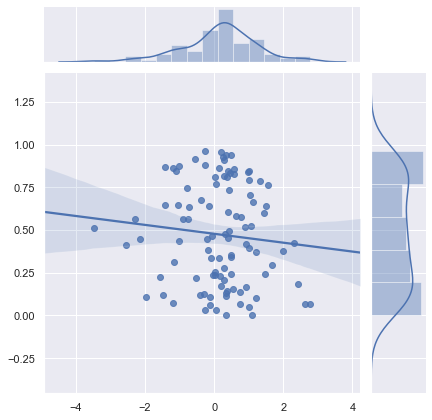

In [256]:
# sns.jointplot
sns.jointplot(x, y,kind='reg')
# sns.jointplot(x, y, kind='kde')


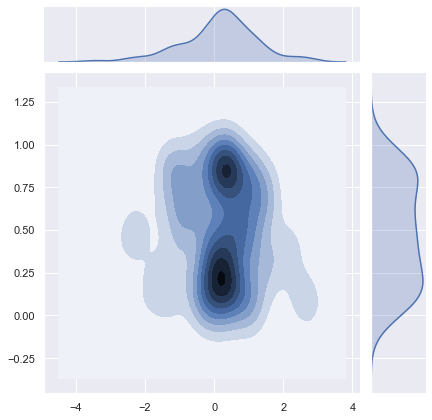

In [258]:
sns.jointplot(x, y, kind='kde')

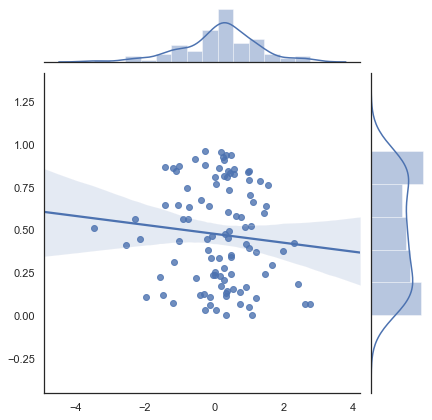

In [259]:
with sns.axes_style("white"):
    sns.jointplot(x, y, kind='reg')

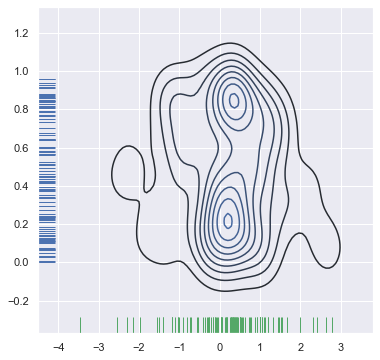

In [276]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(x, y, ax=ax)
sns.rugplot(x, color="g", ax=ax)
sns.rugplot(y, vertical=True, ax=ax)

## plt.hist(直方图)
直方图又称质量分布图，它是表示资料变化情况的一种主要工具。用直方图可以解析出资料的规则性，比较直观地看出产品质量特性的分布状态，对于资料分布状况一目了然，便于判断其总体质量分布情况。直方图表示通过沿数据范围形成分箱，然后绘制条以显示落入每个分箱的观测次数的数据分布。  
属性	说明	类型  
* x	数据	数值类型  
* bins	条形数	int   
* color	颜色	"r","g","y","c"   
* density	是否以密度的形式显示	bool   
* range	x轴的范围	数值元组（起，终）   
* bottom	y轴的起始位置	数值类型   
* histtype	线条的类型	"bar":方形，"barstacked":柱形,<br />"step":"未填充线条"<br />"stepfilled":"填充线条"   
* align	对齐方式	"left":左，"mid":中间，"right":右   
* orientation	orientation	"horizontal":水平，"vertical":垂直   
* log	单位是否以科学计术法	bool   

In [273]:
df_d = pd.DataFrame(data=np.zeros((100,2)), columns=[0, 1])
df_d[0] = x
df_d[1] = y
df_d

,0,1
0,-1.174260,0.313258
1,0.464320,0.835904
2,0.992040,0.841760
3,0.880306,0.515587
4,-1.415100,0.645554
...,...,...
95,2.410744,0.182681
96,0.916170,0.417127
97,0.335073,0.129474
98,-0.172721,0.381438


(array([ 1.,  2.,  2., 11.,  8., 25., 27., 17.,  3.,  4.]),
 array([-3.47, -2.84, -2.22, -1.59, -0.97, -0.34,  0.28,  0.91,  1.54,
         2.16,  2.79]),
 <a list of 10 Patch objects>)

(array([10., 14., 10.,  9., 10.,  7., 10.,  5., 15., 10.]),
 array([0.  , 0.1 , 0.19, 0.29, 0.39, 0.48, 0.58, 0.67, 0.77, 0.86, 0.96]),
 <a list of 10 Patch objects>)

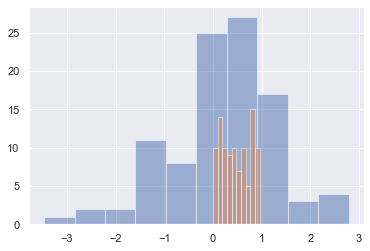

In [274]:
for i in [0,1]:
    plt.hist(df_d[i],density=False,alpha=0.5)

(array([0.02, 0.03, 0.03, 0.18, 0.13, 0.4 , 0.43, 0.27, 0.05, 0.06]),
 array([-3.47, -2.84, -2.22, -1.59, -0.97, -0.34,  0.28,  0.91,  1.54,
         2.16,  2.79]),
 <a list of 10 Patch objects>)

(array([1.04, 1.46, 1.04, 0.94, 1.04, 0.73, 1.04, 0.52, 1.57, 1.04]),
 array([0.  , 0.1 , 0.19, 0.29, 0.39, 0.48, 0.58, 0.67, 0.77, 0.86, 0.96]),
 <a list of 10 Patch objects>)

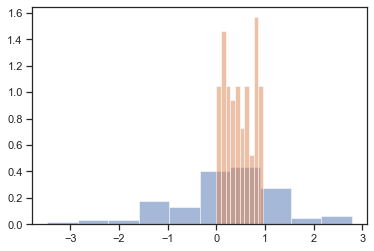

In [339]:
# style must be one of white, dark, whitegrid, darkgrid, ticks
with sns.axes_style("ticks"):
    for i in [0,1]:
        plt.hist(df_d[i],density=True,alpha=0.5)

## boxplot(箱线图)

In [342]:
# 箱线图
df1 = pd.DataFrame(data=[160,123,129,134,122,145,140,163,142,155], columns=["A"])
df1['rank'] = [*"aabbccddee"]
df1

,A,rank
0,160,a
1,123,a
2,129,b
3,134,b
4,122,c
5,145,c
6,140,d
7,163,d
8,142,e
9,155,e


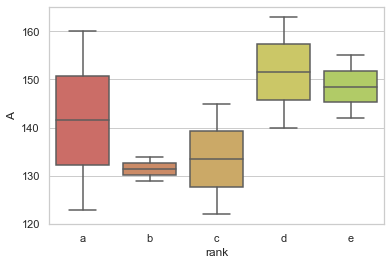

In [344]:
sns.boxplot(data=df1, x="rank",y="A",palette=sns.color_palette("hls", 20)) # 调色板调用
# sns.boxplot(data=df1, x="rank",y="A",palette=sns.color_palette("Blues"))

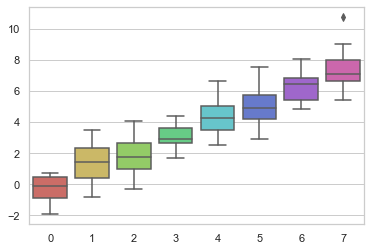

In [358]:
data_1 = np.random.normal(size=(20,8))+np.arange(8)
# data_1
sns.boxplot(data = data_1, palette=sns.color_palette("hls",8)) # 调色板调用

## lineplot（线图）
data:是DataFrame类型的;  
可选：下面均为可选  
* x,y：数据中变量的名称;  
    hue:数据中变量名称(比如：二维数据中的列名)  
    作用：对将要生成不同颜色的线进行分组，可以是分类或数据。 
* size:数据中变量名称(比如：二维数据中的列名)  
    作用：对将要生成不同宽度的线进行分组，可以是分类或数据。 
* style:数据中变量名称(比如：二维数据中的列名)  
    作用：对将生成具有不同破折号、或其他标记的变量进行分组。  
* palette:调试板名称，列表或字典类型  
    作用：设置hue指定的变量的不同级别颜色。  
* hue_order:列表(list)类型  
    作用：指定hue变量出现的指定顺序，否则他们是根据数据确定的。  
* hue_norm:tuple或Normalize对象  
    sizes:list dict或tuple类型  
    作用：设置线宽度，当其为数字时，它也可以是一个元组，指定要使用的最大和最小值，会自动在该范围内对其他值进行规范化。  
* units:对变量识别抽样单位进行分组，使用时，将为每个单元绘制一个单独的行。  
* estimator:pandas方法的名称或回调函数或者None  
    作用：用于在同一x水平上聚合y变量的多个观察值的方法，如果为None，则将绘制所有观察结果。  

,apple,orange,bananas
a,4,3,6
b,0,5,4
c,7,6,5
d,8,7,3


<Figure size 600x400 with 0 Axes>

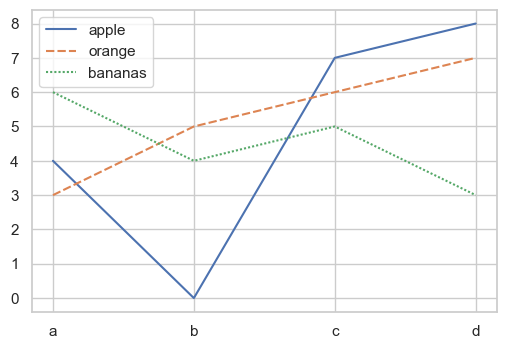

In [364]:
data = {
    'apple':[4,0,7,8],
    'orange':[3,5,6,7],
    'bananas':[6,4,5,3]
}
df1 = pd.DataFrame(data,index=['a','b','c','d'])
df1
plt.figure(dpi=100)
sns.lineplot(data=df1)#一列一条线

### 导入数据

In [21]:
tips = sns.load_dataset("tips") # sns自带的数据集
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 600x400 with 0 Axes>

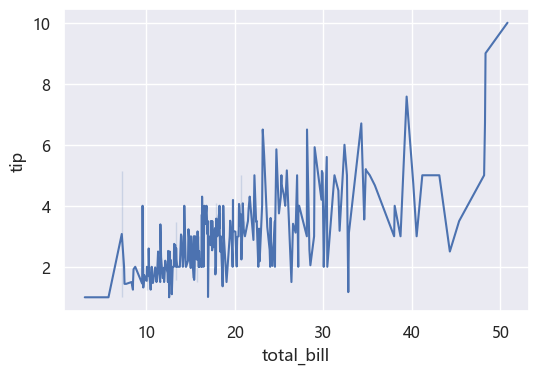

In [22]:
plt.figure(dpi=100)
sns.lineplot(x= 'total_bill',y='tip',data=tips)

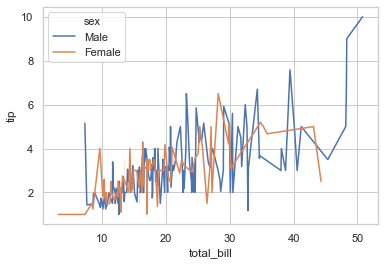

In [365]:
sns.lineplot(x = 'total_bill',y='tip',hue='sex',data=tips)

<Figure size 600x400 with 0 Axes>

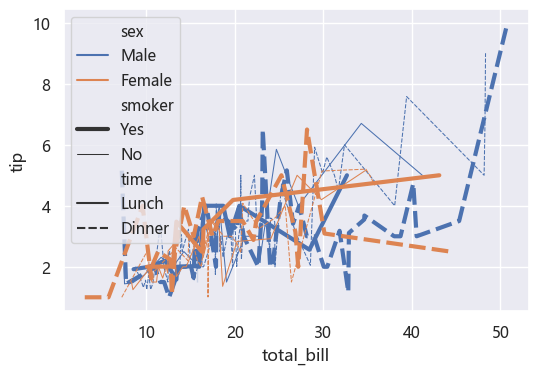

In [24]:
plt.figure(dpi=100)
sns.lineplot(x = 'total_bill',y='tip',hue='sex',size='smoker',style='time',data=tips)

### relplot（散点图）
replot常用参数  
x: x轴  
y: y轴  
hue: 在某一维度上，用颜色区分  
style: 在某一维度上, 用线的不同表现形式区分, 如 点线, 虚线等  
size: 控制数据点大小或者线条粗细  
col: 列上的子图  
row: 行上的子图  
kind: kind= ‘scatter’(默认值)  
   kind='line’时候，可以通过参数ci：(confidence interval)参数，来控制阴影部分，如，ci=‘sd’ （一个x有多个y值）  
   也可以关闭数据聚合功能(urn off aggregation altogether), 设置estimator=None即可  
data  


In [88]:
mpg = sns.load_dataset("mpg")
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


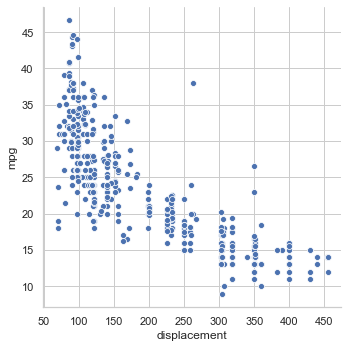

In [367]:
g = sns.relplot(x="displacement",y="mpg",data=mpg_df)#默认散点图

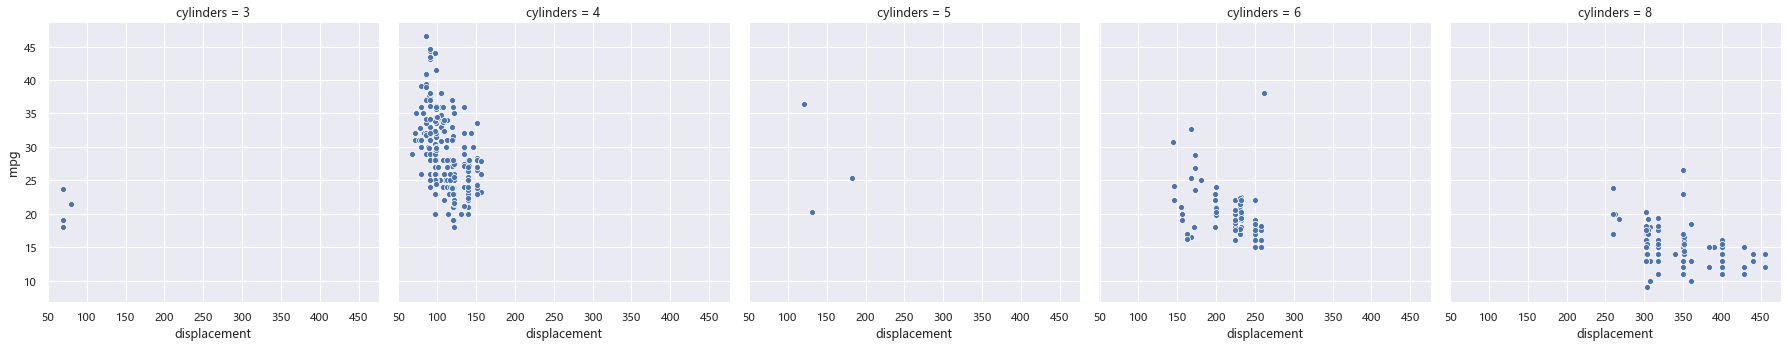

In [27]:
g = sns.relplot(x="displacement",y="mpg",col="cylinders",data=mpg_df)

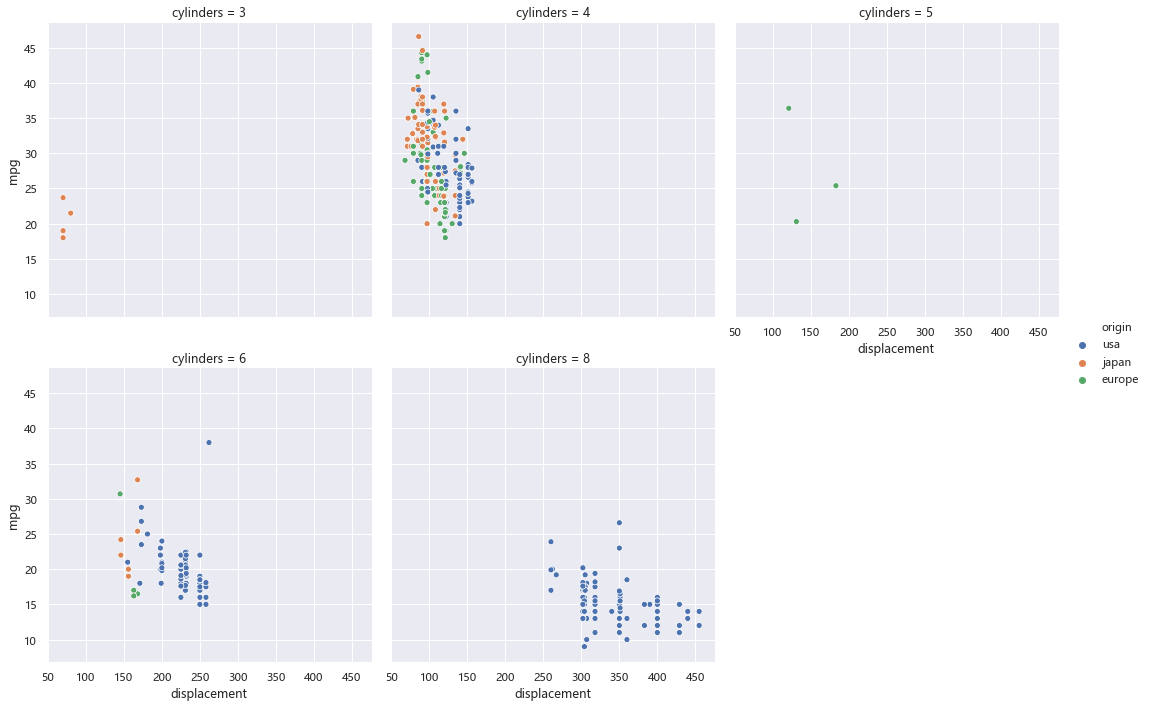

In [28]:
g = sns.relplot(x="displacement",y="mpg",col="cylinders",hue="origin",col_wrap=3,data=mpg_df)

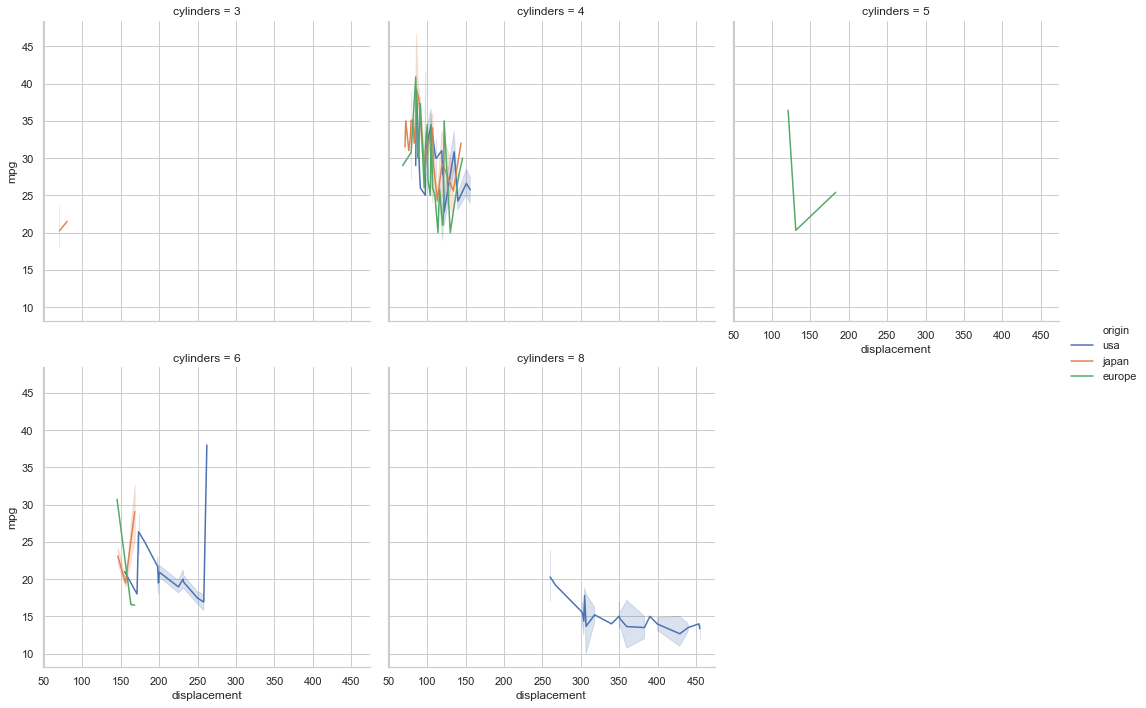

In [370]:
g = sns.relplot(x="displacement",y="mpg",col="cylinders",hue="origin",col_wrap=3,kind="line",data=mpg_df)

## 类别数据
有时候，我们需要对数据按照某一个属性进行绘制观察，而seaborn也提供了这些函数。  

#### 散点图

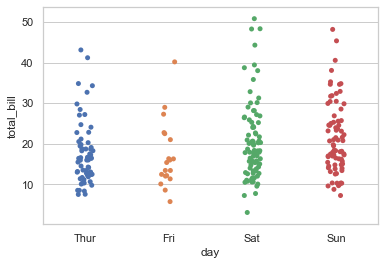

In [387]:
# 按tips数据中横轴为“day”的属性进行“total”展示
tips = sns.load_dataset("tips")
sns.stripplot(x="day", y="total_bill", data=tips)
# sns.stripplot(x="day", y="total_bill", data=tips, palette=sns.color_palette("hls", 20))

这些数据有的地方重叠了，指定参数jitter能将数据散开：  

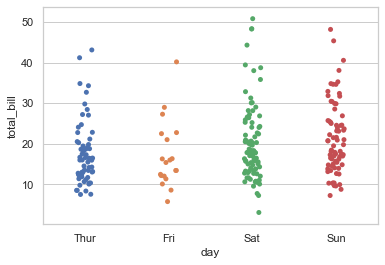

In [392]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

另一个方法是使用swarmplot函数进行绘制，该函数使用了算法将点进行散布，避免重叠：

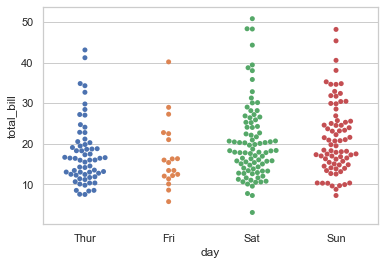

In [393]:
sns.swarmplot(x="day", y="total_bill", data=tips)

而有时候，这些点也是有类别的，按照上述的分类绘制无法观测不同类别的点的分布，hue参数能解决这一点：  

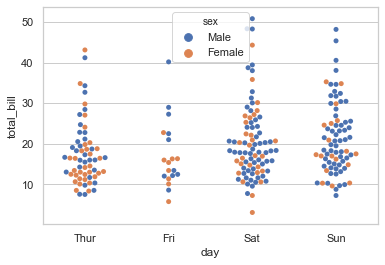

In [394]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

#### 箱盒图

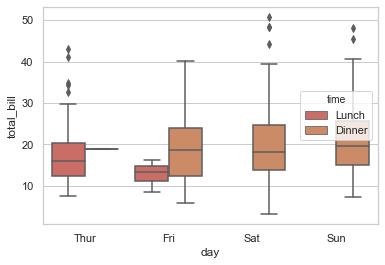

In [388]:
# sns.boxplot(x="day", y="total_bill", hue="time", data=tips)
sns.boxplot(x="day", y="total_bill", hue="time", data=tips, palette=sns.color_palette("hls", 20))

#### 小提琴图

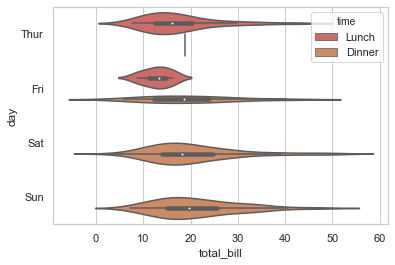

In [389]:
# sns.violinplot(x="total_bill", y="day", hue="time", data=tips)
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, palette=sns.color_palette("hls", 20))

由于小提琴图是和kde估计相关的，所以同样提供了一些参数来控制kde估计：

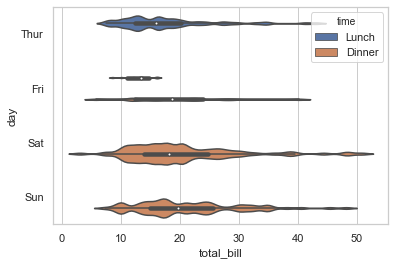

In [379]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)

同样也可以对小提琴图进行类别绘制：

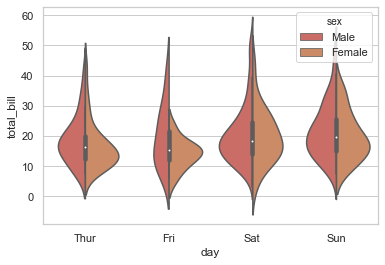

In [391]:
# sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True)
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, palette=sns.color_palette("hls", 20))

可以结合小提琴图和前面的图一起显示

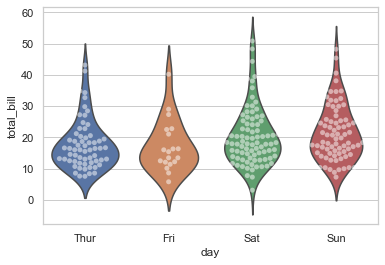

In [381]:
sns.violinplot(x="day", y="total_bill", data=tips, inner=None)
sns.swarmplot(x="day", y="total_bill", data=tips, color="w", alpha=.5)

#### 柱状图

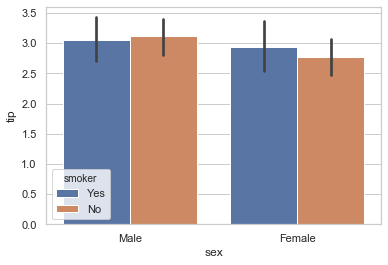

In [384]:
sns.barplot(x="sex", y="tip", hue="smoker", data=tips)

#### 点线图

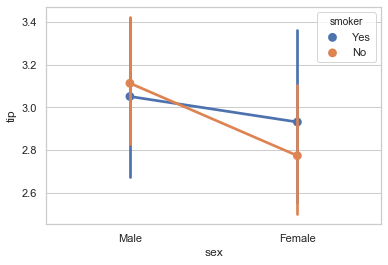

In [385]:
sns.pointplot(x="sex", y="tip", hue="smoker", data=tips)

也可以对其外观进行设置：

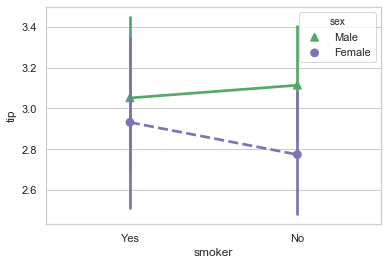

In [398]:
sns.pointplot(x="smoker", y="tip", hue="sex", data=tips,
              palette={"Male": "g", "Female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

## 连接图/两变量图

color : 颜色。参数类型： matplotlib color  
size : 默认 6，图的尺度大小（正方形）。参数类型：numeric  
ratio : 中心图与侧边图的比例，越大、中心图占比越大。参数类型：numeric  
space : 中心图与侧边图的间隔大小。参数类型：numeric  
s : 点的大小。参数类型：numeric  
linewidth : 线的宽度。参数类型：numeric  
edgecolor : 点的边界颜色，默认无色，可以重叠。”w”为白色。参数类型：matplotlib color  
{x, y}lim : x、y轴的范围。参数类型：two-tuples  
{joint, marginal, annot}_kws : dicts Additional keyword arguments for the plot components.   
marginal_kws : 侧边图的信息。例如：dict(bins=15, rug=True)   
annot_kws : 注释的信息。例如：dict(stat=”r”)  

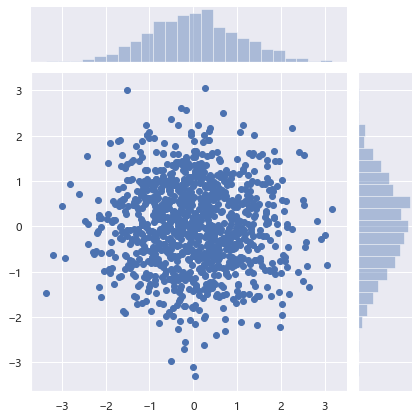

In [32]:
n=1024
x = np.random.normal(0,1,n)
y = np.random.normal(0,1,n)
g = sns.jointplot(x,y) # kind="scatter"

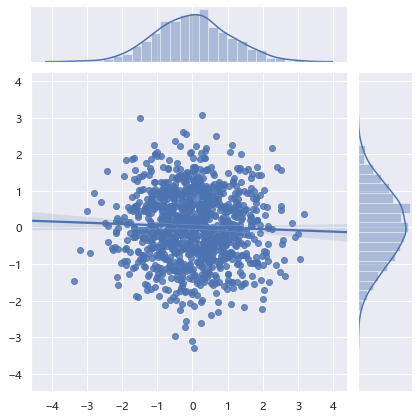

In [33]:
g = sns.jointplot(x,y,kind="reg")

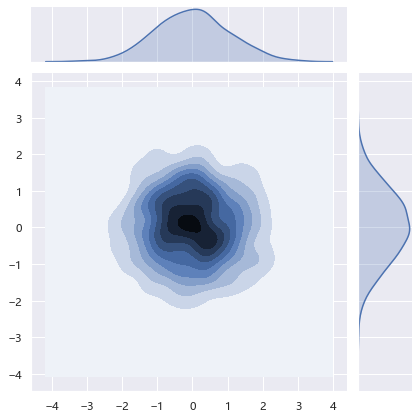

In [34]:
g = sns.jointplot(x,y,kind="kde")

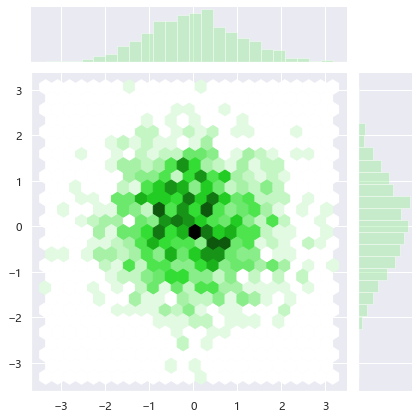

In [35]:
g = sns.jointplot(x,y,kind="hex",color="lightgreen")

### 二维分布图

### 散点图

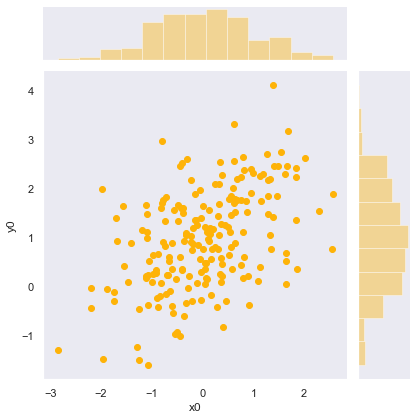

In [320]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data_e = np.random.multivariate_normal(mean, cov, 200)
df_e = pd.DataFrame(data_e, columns=["x0", "y0"])

sns.set_style("whitegrid") # set_style不能放进with语句中
# sns.jointplot(x="x0", y="y0", data=df_e)
with sns.axes_style("dark"):
    sns.jointplot(x="x0", y="y0", data=df_e,color=sns.xkcd_rgb["amber"])

### 六边图

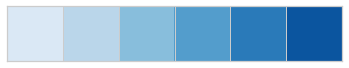

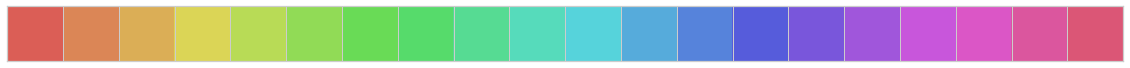

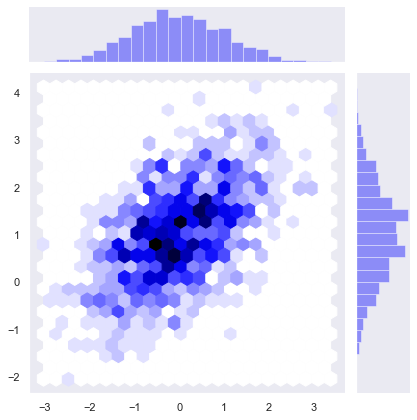

In [323]:
x1, y1 = np.random.multivariate_normal(mean, cov, 1000).T
color_1 = sns.palplot(sns.color_palette("Blues"))
color_2 = sns.palplot(sns.color_palette("hls", 20))
color_3 = sns.diverging_palette(200,20,sep=20,as_cmap=True)

with sns.axes_style("dark"): # 坐标轴颜色
    sns.jointplot(x=x1, y=y1, kind="hex", color="blue");
#     sns.jointplot(x=x1, y=y1, kind="hex", cmap=color_3);
#     sns.jointplot(x=x1, y=y1, kind="hex", palette=color_1);

## 热力图


In [36]:
df = pd.DataFrame(np.random.rand(10,10),columns=list('abcdefghij'))
df

,a,b,c,d,e,f,g,h,i,j
0,0.183431,0.484387,0.662343,0.647503,0.525680,0.108123,0.543749,0.952351,0.376010,0.688997
1,0.059495,0.025956,0.682084,0.719917,0.610025,0.852228,0.797850,0.704427,0.187207,0.323525
2,0.202238,0.130974,0.208794,0.128730,0.730975,0.884013,0.980410,0.918794,0.948234,0.607842
3,0.645786,0.640946,0.596791,0.171877,0.710857,0.055459,0.388496,0.213472,0.992760,0.373058
4,0.746395,0.553709,0.853115,0.929842,0.586285,0.045952,0.239964,0.961445,0.204401,0.782285
5,0.830349,0.018976,0.226626,0.967033,0.816998,0.929814,0.019658,0.276602,0.919843,0.259455
6,0.994963,0.131701,0.077328,0.361260,0.035551,0.346434,0.540446,0.587806,0.327433,0.828164
7,0.981664,0.020312,0.247908,0.958030,0.911017,0.315643,0.875657,0.271581,0.416310,0.829718
8,0.658878,0.886462,0.833065,0.423615,0.394505,0.797385,0.318437,0.098835,0.528016,0.691186
9,0.198416,0.280023,0.494346,0.490681,0.483342,0.526118,0.458312,0.465534,0.433742,0.181330


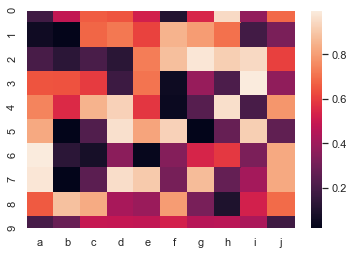

In [372]:
sns.heatmap(df)

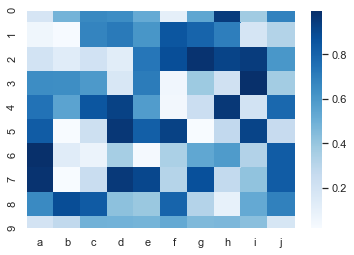

In [373]:
sns.heatmap(df,cmap="Blues")

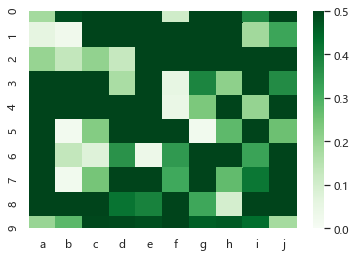

In [39]:
sns.heatmap(df,cmap="Greens",vmin=0,vmax=0.5)#设置最大值最小值

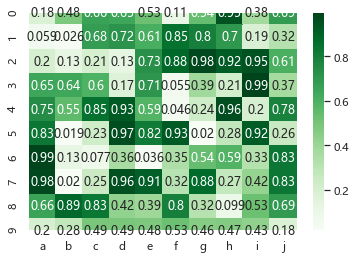

In [40]:
sns.heatmap(df,cmap="Greens",annot=True)

fig, ax = plt.subplots()是一个函数，返回一个包含figure和axes对象的元组。    
fig = plt.figure()其实就是创建一个幕布  
ax=fig.add_subplot(3,4,12)作用是把幕布划分成三行四列，然后选取第12个来画图  

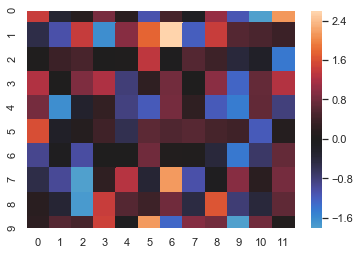

In [374]:
uniform_data = np.random.randn(10, 12)
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.heatmap(uniform_data, center=0)

### 线性回归图

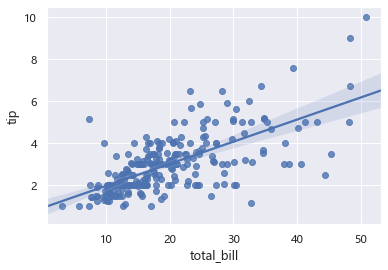

In [42]:
sns.regplot(x='total_bill',y = 'tip',data=tips)

### 分面网格线性回归图

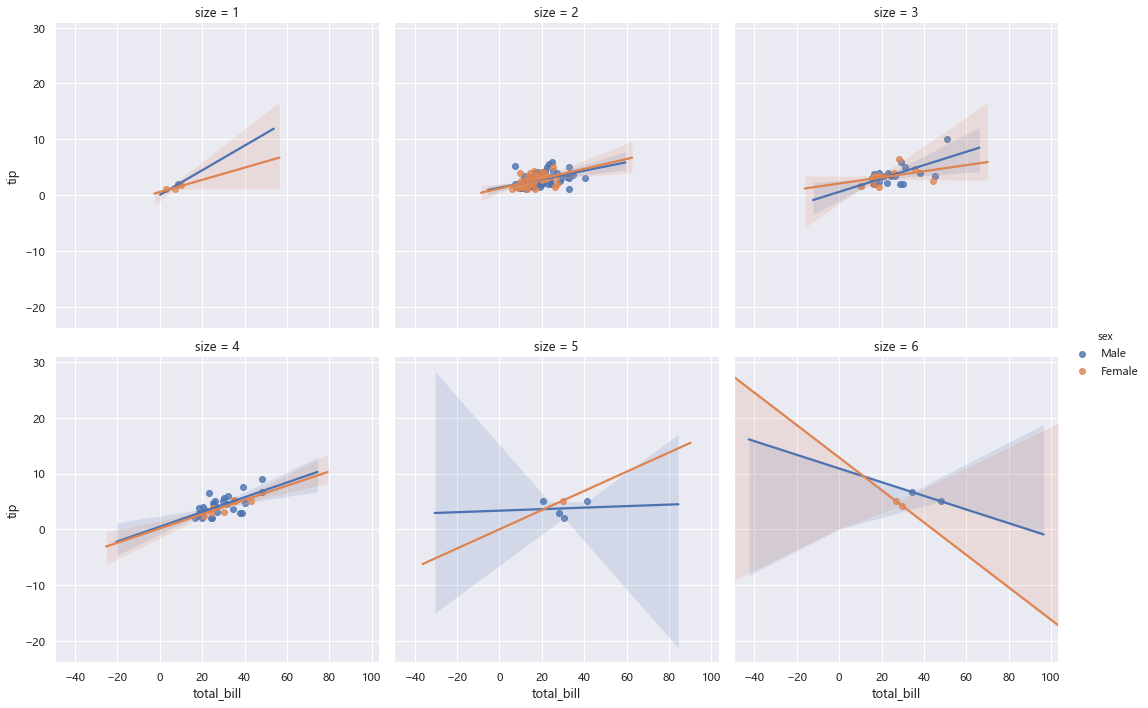

In [43]:
sns.lmplot(x='total_bill',y = 'tip',hue='sex',data=tips,col='size',col_wrap=3)

### 分面网格绘制

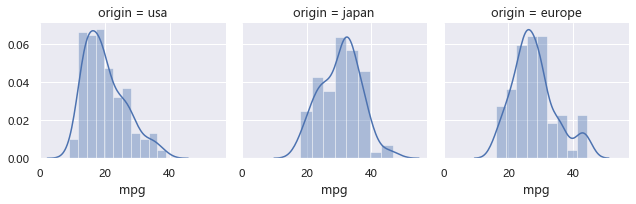

In [44]:
g = sns.FacetGrid(mpg_df,col="origin")
g.map(sns.distplot,"mpg")

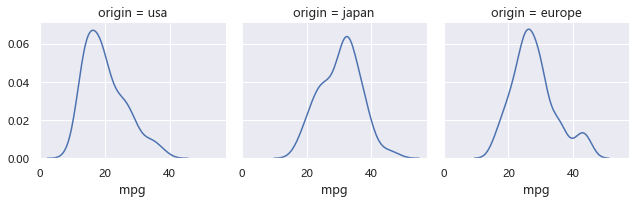

In [52]:
g = sns.FacetGrid(mpg_df,col="origin")
g.map(sns.kdeplot,"mpg")

## 柱状图

### barplot(条形图)
条形图表示数值变量与每个矩形高度的中心趋势的估计值，并使用误差线提供关于该估计值附近的不确定性的一些指示。  
seaborn.barplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=(function mean), ci=95, n_boot=1000, units=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)  
x，y（str）：dataframe中的列名  
data：dataframe或者数组 

##### hue（str）：dataframe的列名，按照列名中的值分类形成分类的条形图

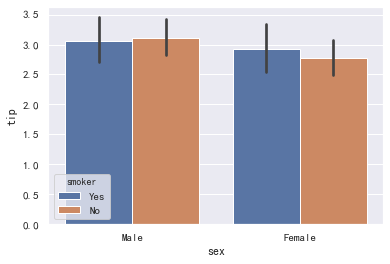

In [89]:
# tips
sns.barplot(x='sex',y='tip',hue="smoker", data=tips)

##### order, hue_order (lists of strings)：用于控制条形图的顺序

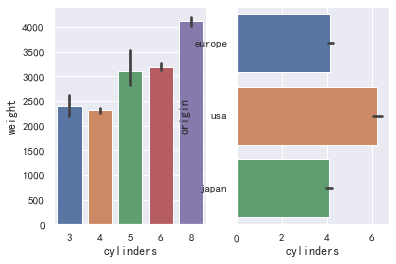

In [87]:
fig,axes=plt.subplots(1,2)
sns.barplot(x="cylinders",y="weight",data=mpg,ax=axes[0])
sns.barplot(x="cylinders",y="origin",data=mpg,ax=axes[1],order=["europe","usa","japan"]) # 顺序

##### estimator：<function name>控制条形图的取整列数据的什么值

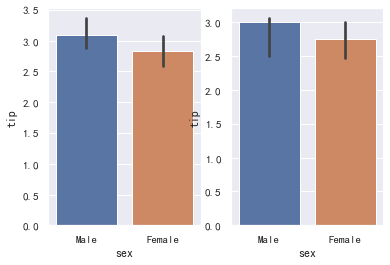

In [90]:
fig,axes=plt.subplots(1,2)
sns.barplot(x="sex",y="tip",data=tips,ax=axes[0])  #左图，默认为平均值
sns.barplot(x="sex",y="tip",estimator=np.median,data=tips,ax=axes[1])  #右图，中位数

##### ci（float）：统计学上的置信区间（在0-100之间）,若填写"sd",则误差棒用标准误差。(默认为95)

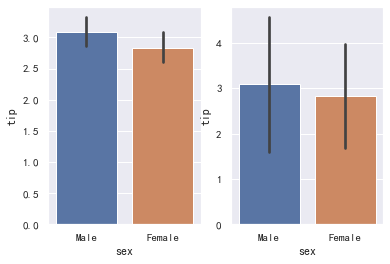

In [94]:
fig,axes=plt.subplots(1,2)
sns.barplot(x="sex",y="tip",ci=95,data=tips,ax=axes[0])  #左图
sns.barplot(x="sex",y="tip",ci="sd",data=tips,ax=axes[1])  #右图

##### capsize（float）: 设置误差棒帽条（上下两根横线）的宽度

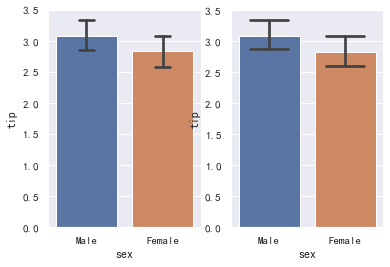

In [95]:
fig,axes=plt.subplots(1,2)
sns.barplot(x="sex",y="tip",data=tips,ax=axes[0], capsize=.2)  #左图
sns.barplot(x="sex",y="tip",data=tips,ax=axes[1], capsize=.5)  #右图

##### palette:调色板，控制不同的颜色style

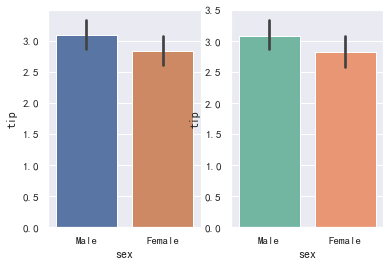

In [101]:
fig,axes=plt.subplots(1,2)
sns.barplot(x="sex",y="tip",data=tips,ax=axes[0])  #上图
sns.barplot(x="sex",y="tip",data=tips,ax=axes[1], palette="Set2")  #下图

##### X,Y轴互换

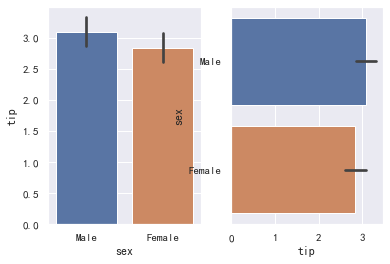

In [104]:
fig,axes=plt.subplots(1,2)
sns.barplot(x="sex",y="tip",data=tips,ax=axes[0])  #左图
sns.barplot(x="tip",y="sex",data=tips,ax=axes[1])  #右图

### countplot(分类直方图)
一个计数图可以被认为是一个分类直方图，而不是定量的变量。基本的api和选项与barplot()相同，因此您可以比较嵌套变量中的计数。（工作原理就是对输入的数据分类，条形图显示各个分类的数量）  
注：countplot参数和barplot基本差不多，可以对比着记忆，有一点不同的是countplot中不能同时输入x和y，且countplot没有误差棒。  
seaborn.countplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75, dodge=True, ax=None, **kwargs)

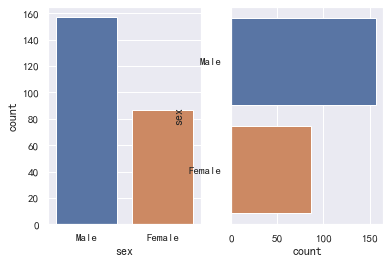

In [110]:
fig,axes=plt.subplots(1,2)
sns.countplot(x="sex",data=tips,ax=axes[0]) #左图
sns.countplot(y="sex",data=tips,ax=axes[1])  #右图
# sns.countplot(y="sex",data=tips,ax=1)  #右图

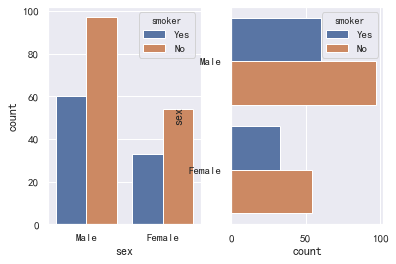

In [111]:
fig,axes=plt.subplots(1,2)
sns.countplot(x="sex",data=tips,ax=axes[0],hue="smoker") #左图
sns.countplot(y="sex",data=tips,ax=axes[1], hue="smoker")  #右图

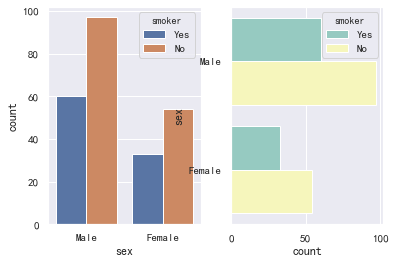

In [112]:
fig,axes=plt.subplots(1,2)
sns.countplot(x="sex",data=tips,ax=axes[0],hue="smoker") #上图
sns.countplot(y="sex",data=tips,ax=axes[1], hue="smoker", palette="Set3")  #下图

##### ax=axes[0,1]
图画在哪个区域  

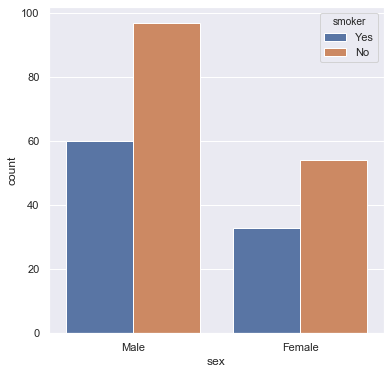

In [280]:
# figsize=(6, 6)设置大小
fig,axes=plt.subplots(figsize=(6, 6))
sns.countplot(x="sex",data=tips,hue="smoker")

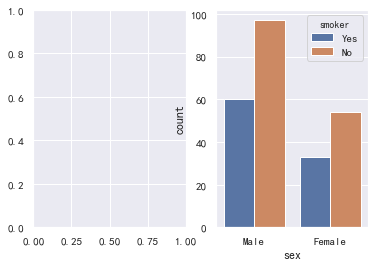

In [122]:
fig,axes=plt.subplots(1,2)
sns.countplot(x="sex",data=tips,ax=axes[1],hue="smoker")

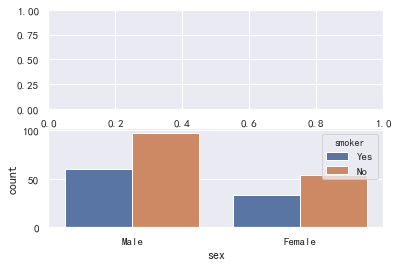

In [123]:
fig,axes=plt.subplots(2,1)
sns.countplot(x="sex",data=tips,ax=axes[1],hue="smoker")

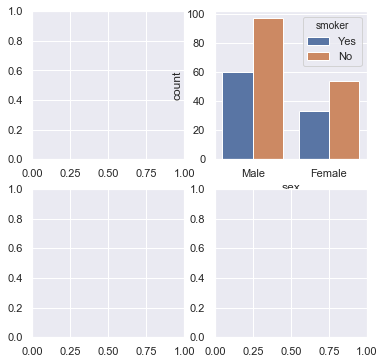

In [279]:
fig,axes=plt.subplots(2,2,figsize=(6, 6))
sns.countplot(x="sex",data=tips,ax=axes[0,1],hue="smoker")

### pointplot（点线图）
点图代表散点图位置的数值变量的中心趋势估计，并使用误差线提供关于该估计的不确定性的一些指示。点图可能比条形图更有用于聚焦一个或多个分类变量的不同级别之间的比较。他们尤其善于表现交互作用：一个分类变量的层次之间的关系如何在第二个分类变量的层次之间变化。连接来自相同色调等级的每个点的线允许交互作用通过斜率的差异进行判断，这比对几组点或条的高度比较容易。  
seaborn.pointplot(x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=(function mean), ci=95, n_boot=1000, units=None, markers='o', linestyles='-', dodge=False, join=True, scale=1, orient=None, color=None, palette=None, errwidth=None, capsize=None, ax=None, **kwargs)  
* pointplot的dodge参数可以使重叠的部分错开
* 通过color参数控制不同单层图的颜色
* 均值点的样式（由参数markers控制）和相同色调的点之间的连线（由参数linestyles控制）


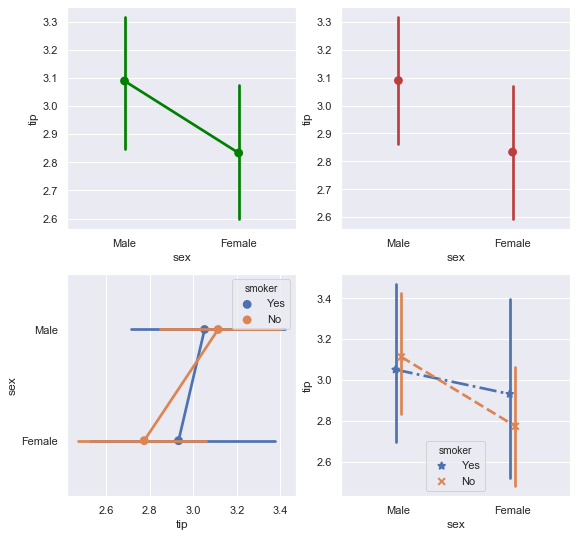

In [282]:
# font_scale = 12
# sns.set(font_scale) # 初始化seaborn配置,并设置字体大小
# sns.set_style("darkgrid") # 灰网格背景
fig,axes = plt.subplots(2,2,figsize=(9, 9))
sns.pointplot(x="sex",y="tip",data=tips, ax=axes[0,0], color="green")
sns.pointplot(x="sex",y="tip",data=tips,ax=axes[0,1],join=False, color="#bb3f3f")
sns.pointplot(y="sex",x="tip",data=tips,ax=axes[1,0],hue="smoker")
# sns.pointplot(x="sex",y="tip",data=tips,ax=axes[1,1],hue="smoker",dodge=True)
sns.pointplot(x="sex",y="tip",data=tips,ax=axes[1,1],hue="smoker",dodge=True,markers=["*","x"],linestyles=["-.","--"])

## seaborn的样式控制
sns.set()是调用了matplotlib中的函数进行了设置。seaborn的控制参数包括两部分，figure样式的控制是用set_style()和axes_style()，而控制图表的plotting_context() 和set_context()。 
##### Figure样式控制
seaborn预先定义了5中主题样式，以适合不同场景需要，分别是：darkgrid, whitegrid, dark, white, 和ticks(刻度样式)，默认是darkgrid。  



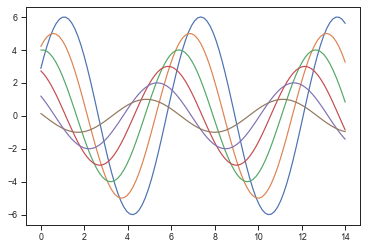

In [221]:
def sinp(flip=1):
    x1 = np.linspace(0,14,100)
    for i in range(1,7):
        plt.plot(x1, np.sin(x1+i*.5)*(7-i)*flip)
sinp()
plt.show()


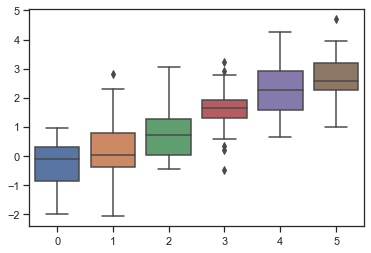

In [212]:
sns.set_style("ticks")
data1 = np.random.normal(size=(20, 6)) + np.arange(6) / 2
sns.boxplot(data=data1)

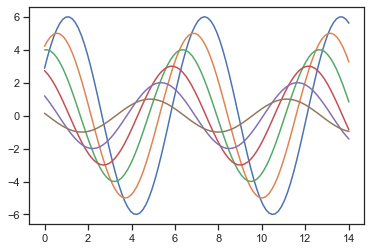

In [197]:
sinplot()

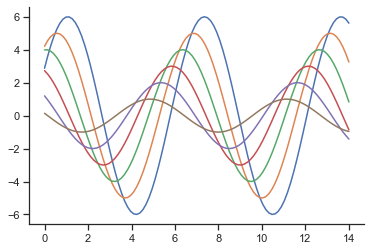

In [196]:
# 移除轴
sinplot()
sns.despine()

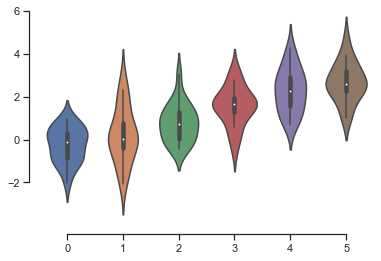

In [217]:
# violinplot
f, axes = plt.subplots()
sns.violinplot(data=data1)
# trim是左下角不连接，offset
sns.despine(offset=10,trim=True)
# sns.despine(offset=10,trim=True, ax = axes[1])
plt.show()

### 图样式
seaborn预定义了4种图表的样式定义，分别是：paper、notebook、talk和poster，默认是notebook，分别看看效果：  

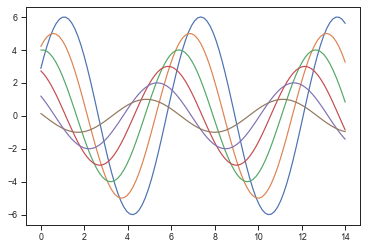

In [223]:
sns.set_context("paper")
sinp()

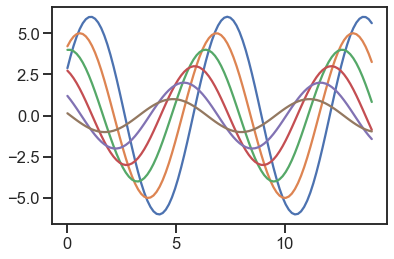

In [226]:
sns.set_context("talk")
sinp()

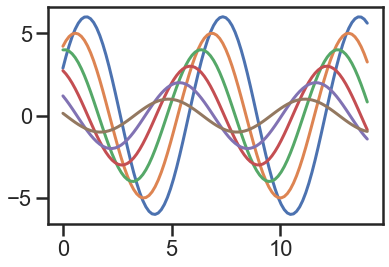

In [227]:
sns.set_context("poster")
sinp()

## 调色板
seaborn中的调色板使用函数color_palette()，该函数接受seaborn或者matplotlib(除了jet)的colormap对象，或者接受RGB、十六进制的颜色表示以及HTML的颜色名，如果不使用任何参数调用color_palette()则返回当前调色板，set_palette()函数则将传入的调色板选择为当前调色板。  


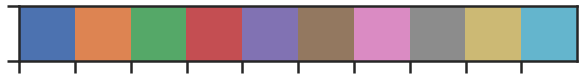

In [228]:
# 获取seaborn的默认调色板
current_palette = sns.color_palette() #  #用调色板调出6种颜色的数值
sns.palplot(current_palette) # #把数值转化成颜色

默认的seaborn调色板只有6中颜色，如果需要增加更多的颜色，最简单的方式是hls颜色空间：  

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.6832, 0.33999999999999997),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6207999999999999)]

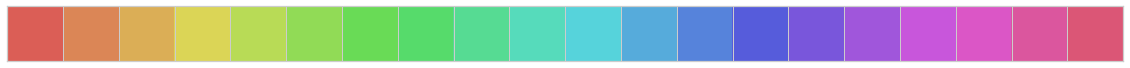

In [400]:
sns.palplot(sns.color_palette("hls", 20))
sns.color_palette("hls", 10)

同时可以使用参数来调整颜色的饱和度和亮度：   

通过传入颜色来创建调色板：

[(0.6078431372549019, 0.34901960784313724, 0.7137254901960784),
 (0.20392156862745098, 0.596078431372549, 0.8588235294117647),
 (0.5843137254901961, 0.6470588235294118, 0.6509803921568628),
 (0.9058823529411765, 0.2980392156862745, 0.23529411764705882),
 (0.20392156862745098, 0.28627450980392155, 0.3686274509803922),
 (0.1803921568627451, 0.8, 0.44313725490196076)]

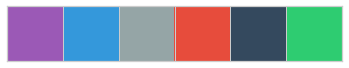

In [401]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.palplot(sns.color_palette(flatui))
sns.color_palette(flatui)

使用颜色名称来创建调色板：

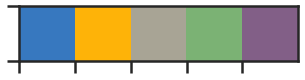

In [232]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
sns.palplot(sns.xkcd_palette(colors))

seaborn提供了一个xkcd_rgb可以快速使用这些颜色名：  

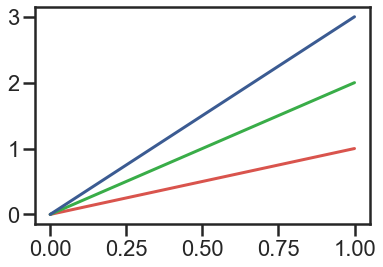

In [233]:
plt.plot([0, 1], [0, 1], sns.xkcd_rgb["pale red"], lw=3)
plt.plot([0, 1], [0, 2], sns.xkcd_rgb["medium green"], lw=3)
plt.plot([0, 1], [0, 3], sns.xkcd_rgb["denim blue"], lw=3)

##### 渐变色

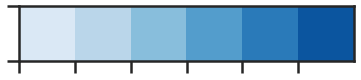

In [234]:
sns.palplot(sns.color_palette("Blues"))

如果要反序这些渐变色，则在颜色后面加_r：

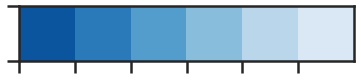

In [235]:
sns.palplot(sns.color_palette("Blues_r"))

cubehelix调色板：

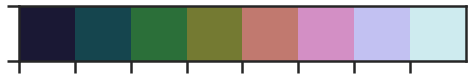

In [236]:
sns.palplot(sns.color_palette("cubehelix", 8))

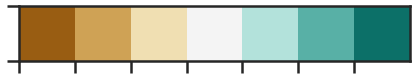

In [237]:
sns.palplot(sns.color_palette("BrBG", 7))